In [109]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure

In [110]:
def read_text_file(filename):
    photon_E, total_yield, yield_error = [],[],[]
    
    copy_lines=[]
    with open(filename) as f:
        lines = f.readlines()

    for line in lines:
        split_line = line.split()
        copy_lines.append(split_line)

    #from each line, extract a name/number and append it into its relevant column
    for i in range(1,len(copy_lines)-1): #2nd line in the file is the first relevant one
        line = copy_lines[i]

        photon_E.append(float(line[0])) #strip element name and type of commas
        total_yield.append(float(line[1]))
        yield_error.append(float(line[2]))

    return([np.array(photon_E), np.array(total_yield), np.array(yield_error)])

In [111]:
[Au_45_E, Au_45_TEY, Au_45_TEY_err] = read_text_file('TEY_files/Au_45deg.txt')
[Ag_45_E, Ag_45_TEY, Ag_45_TEY_err] = read_text_file('TEY_files/Ag_45deg.txt')

[Mg_alloy_full_E, Mg_alloy_full_TEY, Mg_alloy_full_TEY_err] = read_text_file('TEY_files/Mg_alloy_full_yield.txt')
[Aerodag_full_E, Aerodag_full_TEY, Aerodag_full_TEY_err] = read_text_file('TEY_files/Aerodag_full_yield.txt')
[Graphite_full_E, Graphite_full_TEY, Graphite_full_TEY_err] = read_text_file('TEY_files/Graphite_full_yield.txt')
[Coverglass_full_E, Coverglass_full_TEY, Coverglass_full_TEY_err] = read_text_file('TEY_files/Coverglass_full_yield.txt')
[Ti_full_E, Ti_full_TEY, Ti_full_TEY_err] = read_text_file('TEY_files/Ti_full_yield.txt')
[ITO_MLI_aug22_full_E, ITO_MLI_aug22_full_TEY, ITO_MLI_aug22_full_TEY_err] = read_text_file('TEY_files/ITO_MLI_aug22_full_yield.txt')


In [112]:
Y=np.abs(np.array(Au_45_TEY))
E=np.array(Au_45_E)
T = 294 #temperature in Kelvin
k_b=1.38e-23 #Boltzmann constant (J/K)
k=k=8.61733326e-5 #Boltzmann constant (eV/K)
eV=1.602e-19
N=500
c=3e8 #speed of light
h=6.626e-34 #Planck constant

(200, 400)

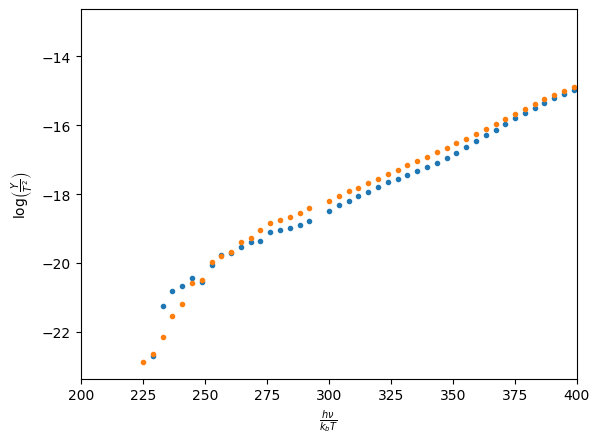

In [113]:
plt.plot(np.array(Au_45_E)*eV/(k_b*T),np.log(np.array(Au_45_TEY)/T**2),'.')
plt.plot(np.array(Ag_45_E)*eV/(k_b*T),np.log(np.array(Ag_45_TEY)/T**2),'.')
plt.xlabel(r'$\frac{h \nu}{k_bT}$')
plt.ylabel(r'log$\left(\frac{Y}{T^2}\right)$')
plt.xlim(200,400)

In [114]:
def convert_nm_to_eV(nm_list):
    eV = 1.602e-19 #Joule, electronvolt
    h = 6.62607004e-34 #J*s, planck constant
    c = 2.99792e8 #m/s', speed of light
    eV_list = []
    for lambda_val in nm_list:
        energy_J = h*c/(lambda_val*1e-9)
        energy_eV = energy_J/eV
        eV_list.append(energy_eV) #in nm
    return(np.array(eV_list))

def convert_eV_to_nm(energy_eV_list):
    # a simple function that takes a list with photon energy values (in eV) and converts them into wavelength (in nm)
    eV = 1.602e-19 #Joule, electronvolt
    h = 6.62607004e-34 #J*s, planck constant
    c = 2.99792e8 #m/s', speed of light
    wavelength_list = []
    for datapoint in energy_eV_list:
        energy_J = datapoint * eV
        wavelength_list.append(h*c/energy_J*1e9) #in nm
    return(wavelength_list)

In [115]:
def RHS(eV_list,WF,B): #freq = light frequency, WF=work function
    k=8.61733326e-5 #Boltzmann constant (eV/K)
    T=294 #temperature in Kelvin
    mu = (np.array(eV_list)-WF)/(k*T)
    f_mu = (np.pi**2)/6+1/2*mu**2-(np.exp(-mu)-1/4*np.exp(-2*mu)+1/27*np.exp(-3*mu))
    RHS = B + np.log(f_mu)
    return RHS

[  5.62545788 -25.70251905]


/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """
/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in add
  """


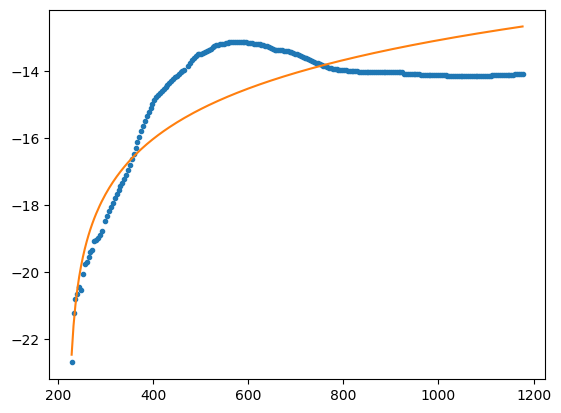

In [116]:
xdata=E[:N]
ydata=np.log(np.array(np.abs(Y[:N]))/T**2)
popt, pcov = curve_fit(RHS, xdata, ydata)
print(popt)

plt.plot(xdata*eV/(k_b*T),ydata,'.')
plt.plot(xdata*eV/(k_b*T), RHS(xdata, *popt))

In [96]:
def find_WF(eV_data=list,yield_data=list,N=int,omit=int,T=int,mat_name=str):
    xdata=eV_data[:N]
    xdata=xdata[omit:]
    ydata=np.log(np.array(np.abs(yield_data[:N]))/T**2)
    ydata=ydata[omit:]
    popt, pcov = curve_fit(RHS, xdata, ydata)
    WF=round(popt[0],2)
    print('WF '+ mat_name + ' = ' + str(WF))
    
    plt.plot((xdata-WF)/(k*T),ydata,'.',label=mat_name)
    plt.plot((xdata-WF)/(k*T), RHS(xdata, *popt))
    return

WF Ti = 5.46


/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """
/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in add
  """
/Users/sebastiankalos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


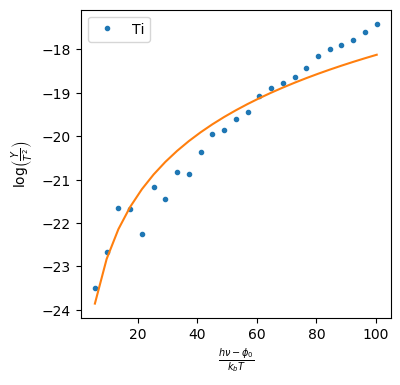

In [106]:
T=294
omit=15
N=40
figure(figsize=(4, 4),dpi=100)
#find_WF(eV_data=Au_45_E,yield_data=Au_45_TEY,N=N,T=T,mat_name='Au')
#find_WF(eV_data=Ag_45_E,yield_data=Ag_45_TEY,N=N,T=T,mat_name='Ag')
#find_WF(eV_data=Mg_alloy_full_E,yield_data=Mg_alloy_full_TEY,N=N,T=T,mat_name='Mg alloy')
find_WF(eV_data=Ti_full_E,yield_data=Ti_full_TEY,N=N,omit=omit,T=T,mat_name='Ti')
plt.xlabel(r'$\frac{h \nu-\phi_0}{k_bT}$')
plt.ylabel(r'log$\left(\frac{Y}{T^2}\right)$')
plt.legend()